In [1]:
import numpy as np
import matplotlib.pyplot as plt
import waves

# Inverse source problem

Take $n=1$, $c=1$ and source term $\delta(t)u(x)$ with $q$ square integrable and supported on $[-\frac{1}{2},\frac{1}{2}]$ and measurements at $x = 1$ for $t\in [0,T]$.

* Show that the forward operator can be expressed as
$$
f(t) = Kq(t) = \int_{1-t}^{1+t} u(x')\mathrm{d}x',
$$
and that the operator is bounded.

* Show that $q$ can *in principle* be reconstructed from $f(t)$ with $t\in [\frac{1}{2},\frac{3}{2}]$ with the following reconstruction formula:
$$
\widetilde{q}(x) = f'(1 - x).
$$

* Show that $v_{\epsilon}(x) = \sin(2\pi\epsilon x)$ is an almost non-radiating source in the sense that $\|K v_{\epsilon}\|/\|v_{\epsilon}\| = \mathcal{O}(\epsilon^{-1})$ as $\epsilon \rightarrow \infty$.

* Now consider noisy measurements $f^{\delta}(t) = K q(t) + \delta \sin(t/\delta)$ and show that the error in the reconstruction is of order 1, i.e.,
$$
\|\widetilde{q} - q\| = \mathcal{O}(1),
$$
as $\delta\downarrow 0$.

* In conclusion, is this inverse source problem well-posed? Why (not)?



# Inverse scattering

Consider the inverse scattering problem for $n=3$, $c=1$, with the incident field resulting from point-sources on the sphere with radius $\rho$ and measurements on the same sphere. The scattering potential is supported on the unit sphere.

* Show that for $\rho \gg 1$, the measurements are given by
$$
\widehat f(\omega,\xi,\eta) \propto \omega^2\widehat{u}(\omega (\xi - \eta)),
$$
where $\widehat{u}$ is the spatial Fourier transform of the scattering potential, $u$, and $\xi,\eta$ are points on the unit sphere.
* Assuming that measurements are available for $\omega \in [\omega_0,\omega_1]$, sketch which wavenumbers of $u$ can be stably reconstructed. In what sense is the problem ill-posed?


# Non-scattering potentials
For $n=2$, $L=1$, $c=1$, with a single incident plane wave, $v_i(t,x) = \sin(\omega(t - \xi\cdot x))$, with direction $\xi$ and measurements parallel to the direction of propagation at the opposite end of the scattering potential. Use the Python code to generate data for a given scattering potential, $r$.

* Determine suitable $\Delta t$, $\Delta x$ and $T$ and generate data for scattering potential $u(x) = \exp(-200|x|^2)$ and an incident plane wave with $\xi = (1,0)$ and $\omega = 10\pi$.
* Construct a non-scattering potential for this incident field and measurements by using the result you obtained in the previous exercise.
* Can you construct a non-scattering potential that is invisible from multiple directions?



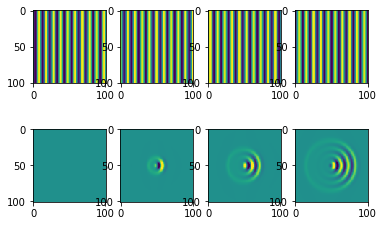

In [4]:
# grid
nt = 201
nx = 101
x = np.linspace(-1,1,nx)
y = np.linspace(-1,1,nx)
t = np.linspace(0,1,nt)
xx,yy,tt = np.meshgrid(x,y,t)

# velocity
c = 1.0

# scattering potential
a = 200;
r = np.exp(-a*xx**2)*np.exp(-a*yy**2);

# incident field, plane wave at 10 Hz.
omega  = 2*np.pi*5
ui = np.sin(omega*(tt - (xx + 1)/c))

# solve
us = waves.solve(r*ui,c,t[1]-t[0],x[1]-x[0],n=2)

# sample
xr = 0.8*np.ones(101)
yr = np.linspace(-1,1,101)

P = waves.sample(x,xr,yr)

d = P@us

# plot
ui.resize((nx,nx,nt))
us.resize((nx,nx,nt))

plt.subplot(241)
plt.imshow(ui[:,:,1])
plt.clim((-1,1))

plt.subplot(242)
plt.imshow(ui[:,:,51])
plt.clim((-1,1))

plt.subplot(243)
plt.imshow(ui[:,:,101])
plt.clim((-1,1))

plt.subplot(244)
plt.imshow(ui[:,:,151])
plt.clim((-1,1))

plt.subplot(245)
plt.imshow(us[:,:,1])
plt.clim((-.001,.001))

plt.subplot(246)
plt.imshow(us[:,:,51])
plt.clim((-.001,.001))

plt.subplot(247)
plt.imshow(us[:,:,101])
plt.clim((-.001,.001))

plt.subplot(248)
plt.imshow(us[:,:,151])
plt.clim((-.001,.001))

plt.show()

# Parameter estimation

For $n=1$, $c=1$, $L=1$, $q(t,x) = w''(t - t_0)\delta(x - x_0)$, with $t_0 = 0.2$, $x_0 = -0.5$ and where $w$ is given by
$$
w(t) = \exp(-(t/\sigma)^2/2).
$$

* Express the solution $v(t,x)$ by using the Green function

The measurements are given by $f(t) = K(c) \equiv v(t,0.5)$. Consider retrieving the soundspeed $c$ by minimizing
$$
J(c) = \|K(c) - f\|^2.
$$

* Plot the objective as a function of $c$ for various values of $\sigma$.
* Do you think Newton's method will be successful in retrieving the correct $c$?
